# <font color=green> Otel Rezervasyon Bilgileri: </font>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
import scipy
import math
import plotly.express as px
import statsmodels.api as sm

In [12]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

In [13]:
api= KaggleApi()
api.authenticate()

In [14]:
# Yarışma veri kümesi için yarışmaya katıldıktan yani izinleri kaul ettikten sonra veriyi indirme şekli:
api.competition_download_file("playground-series-s3e7",
                             "train.csv")

100%|████████████████████████████████████████████████████████████████████████████████| 510k/510k [00:00<00:00, 810kB/s]

In [15]:
import zipfile

# Sıkıştırılmış dosyayı çıkartma
with zipfile.ZipFile("train.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# "train.csv" dosyasını DataFrame olarak okuma
df = pd.read_csv("train.csv")

In [16]:
api.competition_download_file("playground-series-s3e7",
                             "test.csv")

100%|████████████████████████████████████████████████████████████████████████████████| 334k/334k [00:00<00:00, 591kB/s]

In [17]:
import zipfile

# Sıkıştırılmış dosyayı çıkartma
with zipfile.ZipFile("test.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# "train.csv" dosyasını DataFrame olarak okuma
dftest = pd.read_csv("test.csv")

## <font color=green> Veri İnceleme ve Düzenleme: </font>

In [18]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


Bir otel rezervasyonuyla ilgili bazı bilgiler bulunuyor. İşte bu veri örneğinin sütunlarını ve verilerini açıklayalım:

1. `id`: Her bir veri örneğinin benzersiz bir kimlik numarası.
2. `no_of_adults`: Rezervasyon yapan yetişkin sayısı.
3. `no_of_children`: Rezervasyon yapan çocuk sayısı.
4. `no_of_weekend_nights`: Hafta sonu geceleri için rezervasyon yapılan gece sayısı.
5. `no_of_week_nights`: Hafta içi geceleri için rezervasyon yapılan gece sayısı.
6. `type_of_meal_plan`: Yemek planının türü.
7. `required_car_parking_space`: Otopark gereksinimi (1: Otopark gerekiyor, 0: Otopark gerekmiyor).
8. `room_type_reserved`: Rezerve edilen oda tipi.
9. `lead_time`: Rezervasyon yapılma tarihi ile varış tarihi arasındaki zaman farkı (gün cinsinden).
10. `arrival_year`: Varış yılını gösteren sütun.
11. `arrival_month`: Varış ayını gösteren sütun.
12. `arrival_date`: Varış tarihini gösteren sütun.
13. `market_segment_type`: Pazar segmenti türü.
14. `repeated_guest`: Tekrarlayan misafir olup olmadığını gösteren sütun (1: Tekrarlayan misafir, 0: Yeni misafir).
15. `no_of_previous_cancellations`: Önceki rezervasyonların iptal sayısı.
16. `no_of_previous_bookings_not_canceled`: Önceki rezervasyonların iptal edilmeyen sayısı.
17. `avg_price_per_room`: Oda başına ortalama fiyat.
18. `no_of_special_requests`: Özel istek sayısı.
19. `booking_status`: Rezervasyonun durumu (1: Onaylandı, 0: Onaylanmadı).

In [19]:
print(df.shape)
print(dftest.shape)

(42100, 19)
(28068, 18)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42100.0,21049.500000,12153.367503,0.0,10524.75,21049.50,31574.25,42099.0
no_of_adults,42100.0,1.920713,0.524950,0.0,2.00,2.00,2.00,4.0
no_of_children,42100.0,0.141093,0.450128,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,42100.0,0.884632,0.885693,0.0,0.00,1.00,2.00,7.0
no_of_week_nights,42100.0,2.398005,1.427330,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,42100.0,0.239192,0.587674,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,42100.0,0.025249,0.156884,0.0,0.00,0.00,0.00,1.0
room_type_reserved,42100.0,0.428931,0.832605,0.0,0.00,0.00,1.00,6.0
lead_time,42100.0,103.888029,81.069343,0.0,37.00,93.00,155.00,443.0
arrival_year,42100.0,2017.856295,0.350795,2017.0,2018.00,2018.00,2018.00,2018.0


In [23]:
df.corr()['booking_status'].sort_values(ascending=False)

booking_status                          1.000000
lead_time                               0.374865
arrival_year                            0.178326
avg_price_per_room                      0.157484
market_segment_type                     0.112648
no_of_adults                            0.079760
no_of_week_nights                       0.058506
type_of_meal_plan                       0.045980
no_of_weekend_nights                    0.044279
arrival_month                           0.007639
id                                      0.007264
no_of_children                          0.004260
arrival_date                            0.003124
room_type_reserved                     -0.023087
no_of_previous_cancellations           -0.045599
no_of_previous_bookings_not_canceled   -0.080166
required_car_parking_space             -0.093262
repeated_guest                         -0.136065
no_of_special_requests                 -0.220278
Name: booking_status, dtype: float64

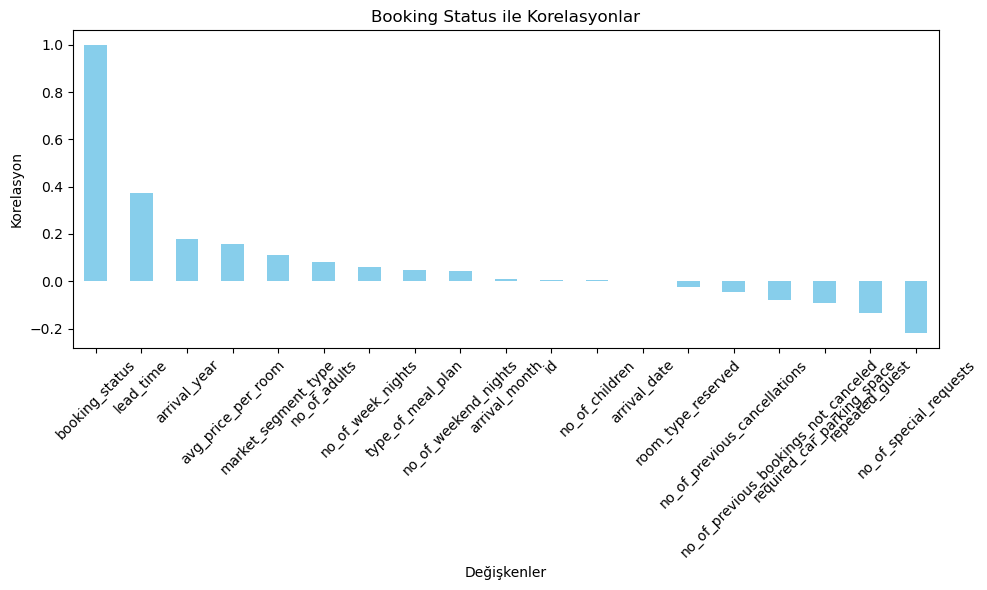

In [58]:
# Korelasyonları hesapla ve sırala
correlation_series = df.corr()['booking_status'].sort_values(ascending=False)

# Veriyi görselleştir
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlayabilirsiniz
correlation_series.plot(kind='bar', color='skyblue')
plt.title('Booking Status ile Korelasyonlar')
plt.xlabel('Değişkenler')
plt.ylabel('Korelasyon')
plt.xticks(rotation=45)  # Değişken etiketlerini döndürmek için
plt.tight_layout()
plt.show()

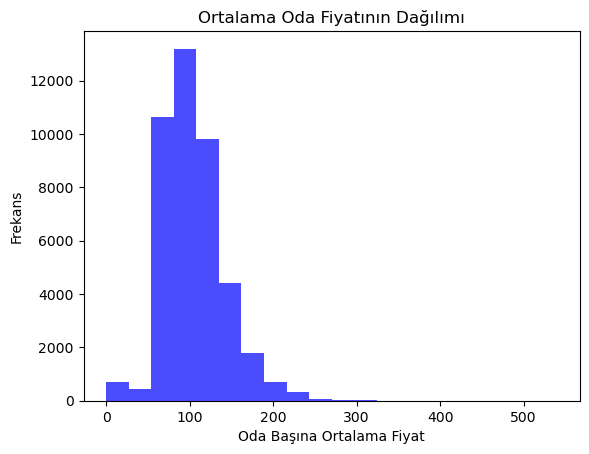

In [24]:
# Histogram
plt.hist(df['avg_price_per_room'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Oda Başına Ortalama Fiyat')
plt.ylabel('Frekans')
plt.title('Ortalama Oda Fiyatının Dağılımı')
plt.show()

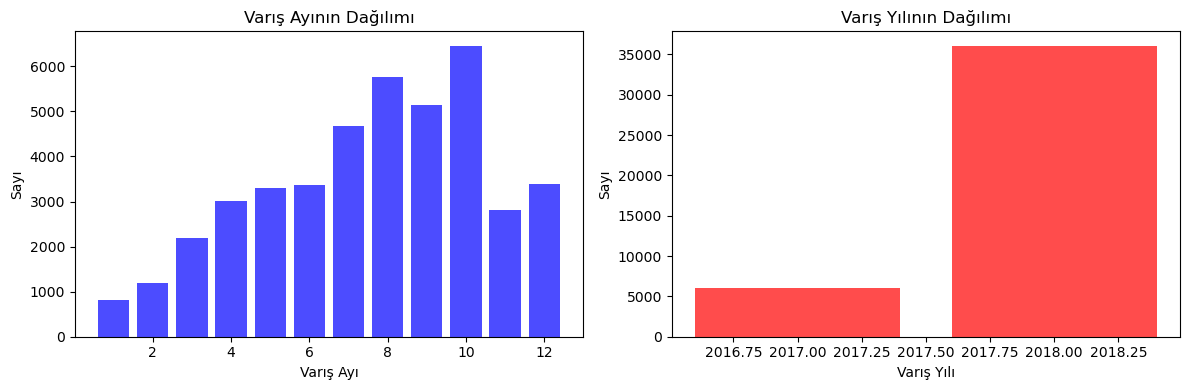

In [33]:
# Veri çerçevesinden sadece ilgili sütunları seçin
selected_columns = df[['arrival_month', 'arrival_year']]

# Büyük bir figür oluşturun
plt.figure(figsize=(12, 4))

# İlk grafik (Varış Ayı)
plt.subplot(121)  # 1 satır, 2 sütunlu subplotun ilki
month_counts = selected_columns['arrival_month'].value_counts().sort_index()
months = np.arange(1, 13)
plt.bar(months, month_counts, color='blue', alpha=0.7)
plt.xlabel('Varış Ayı')
plt.ylabel('Sayı')
plt.title('Varış Ayının Dağılımı')

# İkinci grafik (Varış Yılı)
plt.subplot(122)  # 1 satır, 2 sütunlu subplotun ikincisi
year_counts = selected_columns['arrival_year'].value_counts().sort_index()
years = year_counts.index
plt.bar(years, year_counts, color='red', alpha=0.7)
plt.xlabel('Varış Yılı')
plt.ylabel('Sayı')
plt.title('Varış Yılının Dağılımı')

# Grafikleri göster
plt.tight_layout()  # Grafiklerin düzenini ayarlar
plt.show()

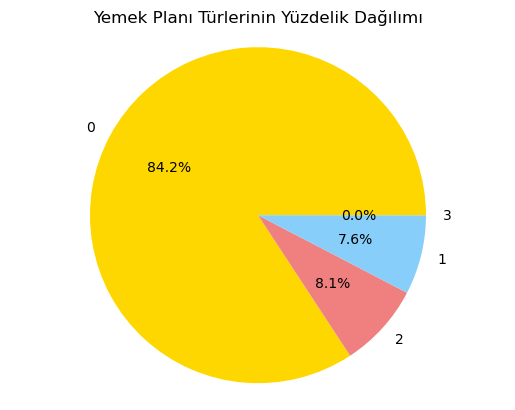

In [27]:
# Pasta Grafiği
meal_plan_counts = df['type_of_meal_plan'].value_counts()
plt.pie(meal_plan_counts, labels=meal_plan_counts.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue'])
plt.axis('equal')  # Daire şeklinde görüntülemek için
plt.title('Yemek Planı Türlerinin Yüzdelik Dağılımı')
plt.show()

`type_of_meal_plan` sütunundaki değerler genellikle bir otel veya konaklama tesisi tarafından sunulan yemek planlarını temsil eder. Genellikle bu değerler aşağıdaki şekilde anlam taşır:

- 0: Oda sadece konaklama içindir ve yemek planı yoktur.
- 1: Oda ve yemek (örneğin, kahvaltı) içerir.
- 2: Oda ve yemek (örneğin, yarım pansiyon) içerir.
- 3: Oda ve tam yemek planı (örneğin, tam pansiyon) içerir.

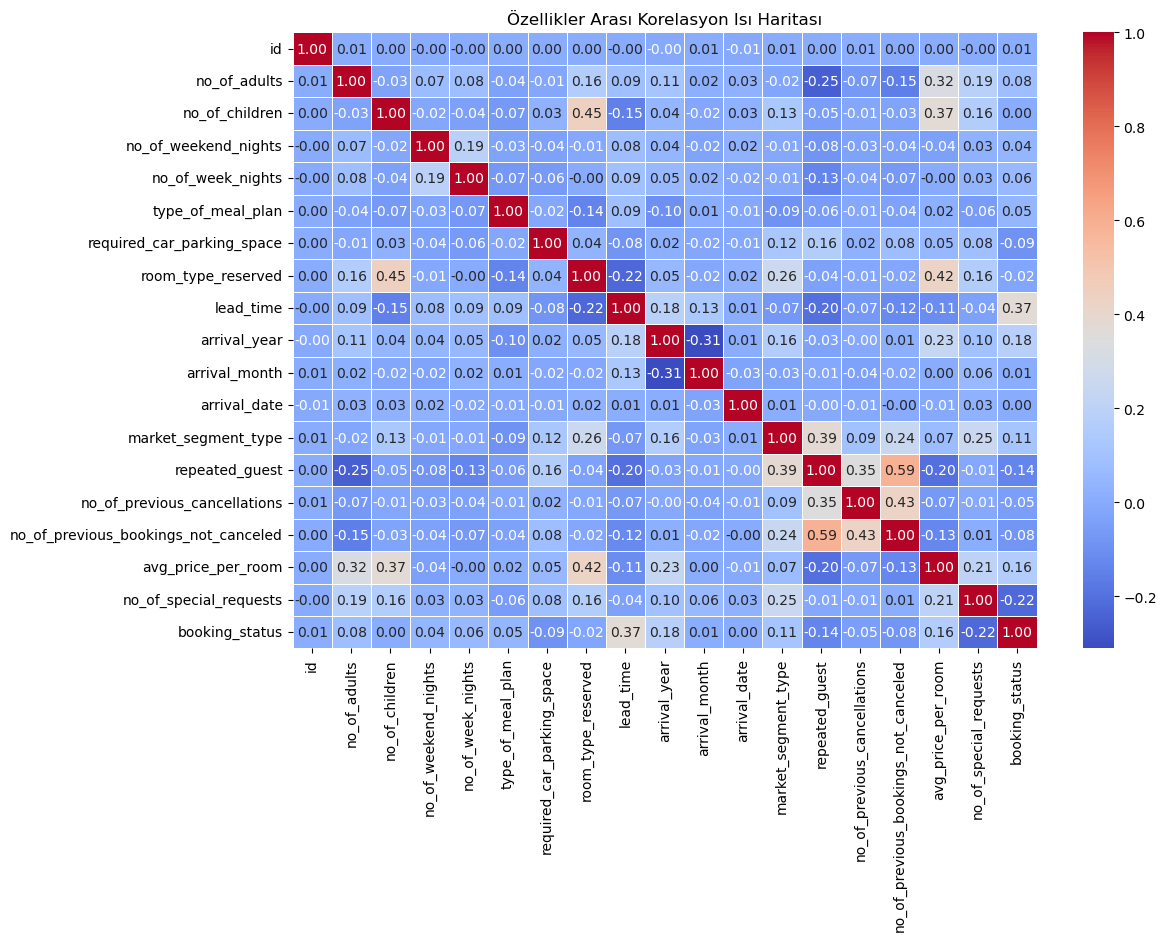

In [62]:
# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arası Korelasyon Isı Haritası')
plt.show()

## <font color=green> Modelleme: </font>

In [37]:
# Classification (Rezervasyon yaotıracak mı yaptırmyacak mı?)

In [41]:
x = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [42]:
def fnc_all_classification_models(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
   
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [44]:
fnc_all_classification_models(x,y)

,accuracy_score
XGBClassifier,0.822328
RandomForestClassifier,0.813064
BernoulliNB,0.743943
DecisionTreeClassifier,0.743112
LogisticRegression,0.725059
KNeighborsClassifier,0.673872
SVC,0.611639
GaussianNB,0.525534


In [46]:
# Test verisi tahmin:

In [47]:
dftest.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Verileri eğitim ve test olarak ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Tahmin sonuçlarını içeren veri çerçevesini ve dftest verisini kullanarak eksik booking_status'u tahmin etme
# Örnek olarak, XGBClassifier ile tahmin yapalım
from xgboost import XGBClassifier

# Modeli eğitme
model = XGBClassifier()
model.fit(x_train, y_train)  # X_train ve y_train, eğitim verileriniz ve hedef sütununuz olsun

# booking_status sütununu tahmin etme
y_pred = model.predict(dftest)  # dftest, eksik booking_status değerlerini içeren veri çerçevesi olsun

# Tahmin sonuçlarını booking_status sütununa yazma
dftest['booking_status'] = y_pred

In [55]:
dftest.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2,0
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1,0
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0,0


In [57]:
dftest["booking_status"].value_counts()

0    19536
1     8532
Name: booking_status, dtype: int64